In [2]:
#Notice the imports!

from IPython.display import Image #if you don;t have this just delete it (its just for fun)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Week 10 Lab

## Annoucements:

1. Lab 7 is out - due April 15th at 8 pm
2. HW 3/4 being released 04/09 (Friday) and is due April 27th at 8 PM
3. If you filled out the google form for comments on your final project dataset, you should've heard from me by now.

## As always, please email me for questions, office hours, etc.

## Today's Agenda

1. Review of Hypothesis Testing
2. Permutation Testing
3. Simulation Example
4. Practice for groupby (if we have time)

# 1. Hypothesis Testing Review

Recall from lecture and last week's Lab, that hypthesis testing is how we structure our studies.

In particular, we set up our study by designating a "null" and "alternative" hypothesis.

Our null is what we assume in our model. It is our starting point. The P-value we are going to generate is based on assuming the null.

Given this, our null is usually very conservative - meaning we want to start by assuming the simplest and most straightforward explanation possible.

This usually means assuming there is no relationship between two variables.

In cases were it doesn't make sense to assume no relationship or where we have a lot of earlier studies or data, our null should usually be whatever history or experience suggests is the case.

For a coin or dice, that is to assume that they are fair.

If we are looking at a group of people, for example smokers or circus performers, our null should be that they are no different on average than the general population. It is up to the data to provide evidence against this null hypothesis.

If we do find evidence against the null hypothesis, we are finding some support for the alternative hypothesis. 

The alternative hypothesis is simply  everything that is not the null (what in know in set theory as the complement).

So if the null is that there is no relationship between two variables, the alternative is that there is.


## Hypothesis testing and P-values

Therefore when we use data to test a hypothesis - we are assuming the null is true. 

We then calculate the propability of seeing that data (what we actually saw) if the null was true.

That probability is the p-value (as we have discussed).

The P-value **is not** the probability the null is true, or the probability of the alternative hypothesis being true!

The P value **is** the probability of the data we observed if the null hypothesis is true.

This is worth understanding! 

Please reach out to me if you need some more time with this.

## When hypothesis testing makes errors

Remember that we use a p-value cutoff to accept or reject the null.

Typically, we say if the p-value is below .05 (5%) we reject the null, otherwise we fail to reject the null.

What this means is, if the data we observed (or something more extreme) would only occur 5% or less of the time if the null is true, then we reject the null.

Basically, what we observed would be very rare if the null was true, so we think the null isn't true.

For example, let's say my null is "most trees have green leaves". 

And then you went and observed a bunch of trees, and most or all of them had red leaves.

You would think, if most trees have green leaves, it would be very, very unlikely for me to see so many trees with red leaves.

So we think this is evidence that the null is false. 

**BUT** we also know that sometimes rare things do happen!

More specifically, we know that if the null is true, events of such extremety that they only occur 5% of the time, will occur 5% of the time. 

Essentially, we know that if the null is true then extreme events, the same events that give us P-values below .05, will happen 5% of the time!

So that means that if we did a lot of studies, and the null really is true, we will sill reject it 5% of the time.

This is called our **Type 1 error rate**. 

A type 1 error is a false positive. It means we rejected the null, when the actual truth is that the null is true.

Interestingly, we always know this type 1 error rate because we determine it. It is just our p-value threshold!

Remember, we know that if we use a p-value threshold of 5%, then we will reject the null whenever we observe data that would occur 5% or less of the time if the null was true.

But if the null is true, and we do lots of studies on different data, we know that this 'rare' data, things that happen 5% or less of the time, will occur about 5% of the time!

In those cases, we'll reject the null - even though it is true. This is a false positive or type 1 error.

What this means is that if the null is true and we do lots and lots of studies, on average we will fail to reject the null 95% of the time, and 5% reject the null - even though the null is true.

Basically, sometimes the data is just weird. You'll get a sample that is super duper unlikely to occur. And it is very possible to reject the null because your sample strongly suggests it. But you'll be wrong. You just got a 'rare' sample.

What is great about p-value is we know, on average, how often you'll make this mistake.

It is just your p-value threshold. If that number is .1 or 10%, it means average, when the null is true, you'll reject it 10% of the time.





# 2. Permutation Testing

So what is permutation testing?

Well a permutation is just an ordering of elements.

For example if I have three elements, A, B & C, I could have one permutation that is ABC, and another that is BAC (there are a total of 6 possible permutations of 3 unique elements). 

Cool. So how do we use these to test things?

Remember, how do we do basic hypothesis testing with a simulation?

Well, we assume the null is true.

Then, we generate a bunch of data based on the null.

Then, we see how common what we actually observed (or something more extreme) is in the simulation.

This gives us a p-value, or the probability of getting what we observed in a simulation if the null is true.

This is super easy if we are testing theories about coin flips or dice rolls. But what if we want to test a theory about two variables?

## Simulations for Two Variable Relationships

Let's say we want to test the relationship between two variables, like height and weight.

First, let's say that we already have some data  - in particular we have a bunch of observations of people with their height and weight, and we divide the everyone either into the tall or short group.

Our null is that there is no relationship. In particular, lets say that those people who have above average height have, on average, the same weight as those with below average height.

How would we simulate this?

Well, we could, for each person, just randomly simulate a height for them. And because our null is that there is no relationship between height and weight, we would simulate everyones height the same way - meaning from the same distribution.

We know on over many simulations on average the difference between the average height of tall people and average height of short people would be zero in our simulation - because we randomly generated a height for everyone from the same distribution.

But we also know, due to random noise, sometimes the differences between the two groups will be large (even though on average it will be zero). 

So we could then look at our observed statistic (the actual difference in height between the two groups in our observed data) and see how common it (or something more extreme) is in our simulation.

Where is the problem?

Well - how do you simulate weights?

You could use a normal distribution with a mean and standard deviation from all your data. 

But that is sort of complicated - and we don't actually know its right.

For example, we don't necessarily know what the true data generating weight distribution is.

So we don't actually know how to simulate weight. 

## Permutations as Simulations

But permutations are here to rescue us.

We already have a bunch of real world weights - they are in our data.

So instead of simulating weights, we will simulate which person has which weight.

What I mean by that, is we will take a random weight in the dataset and assign that weight to one person - and we will do this for every weight and each person.

How is this a permutation?

Well imagine the original weight in order were (in lb) 168, 187, 145, 158.

Now, we do a random permutation where the order is now 187, 158, 168, 145.

That means in this simulation we are going to act as if person one has a weight of 187 (rather than their real weight of 168), person two has a weight of 158, person three 168, etc.

So basically, every time we randomly assign a weight to someone in our dataset it is a permutation.

Every different permutation of the weight we have is a different simulation.

So why do we do this?

Well, the null is that there is no relationship between height and weight. 

When we randomly assign weights to people - we know for a fact that there is no relationship because we randomly assigned people their weights!

So every time we do a permutation we create one simulation where the null is true.

Therefore we can simulate many possible random datasets where height and weight really are disconnected (because we disconnected them!).

We can then do exactly what we did before.

We can see how large the differences between tall and short groups are, and then see how common what we actually observed (or more extreme) was.

Let's see an example:

#  This is Bob Ross

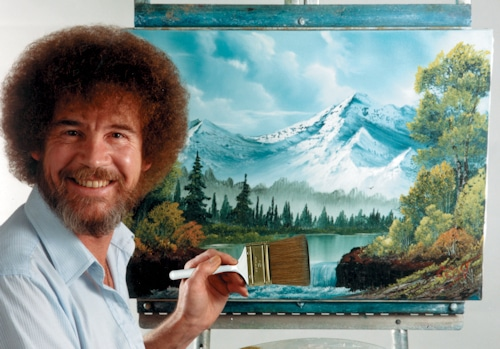

In [3]:
Image(filename = "bob.jpg", width=1000, height=100)

Who is Bob Ross?

He was a painter.

He painted on TV.

He was a really, really nice dude.

And an even more amazing painter.

I strongly encourage you to watch some Bob Ross.

Here are some Bob Ross Memes:


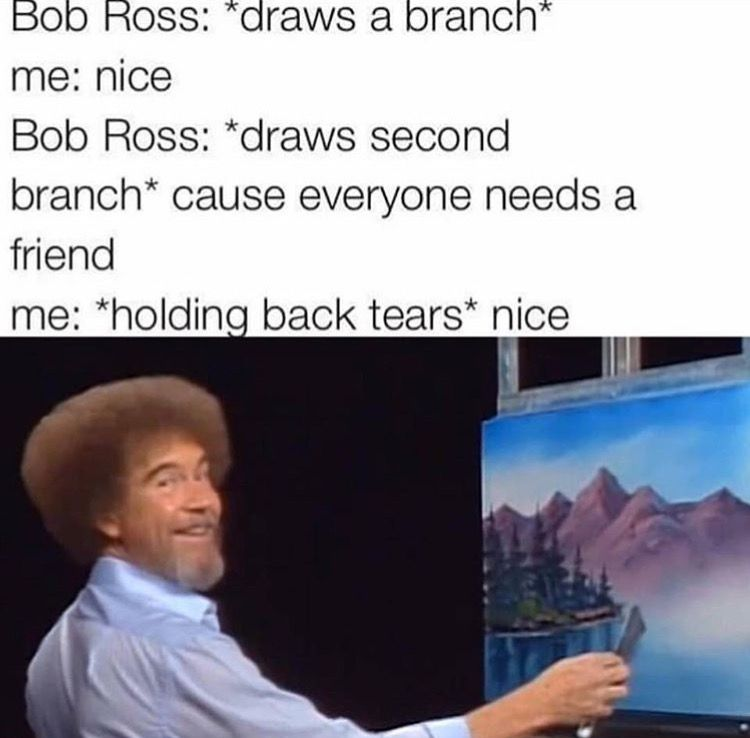

In [4]:
Image(filename = "bob2.jpg", width=1000, height=100)

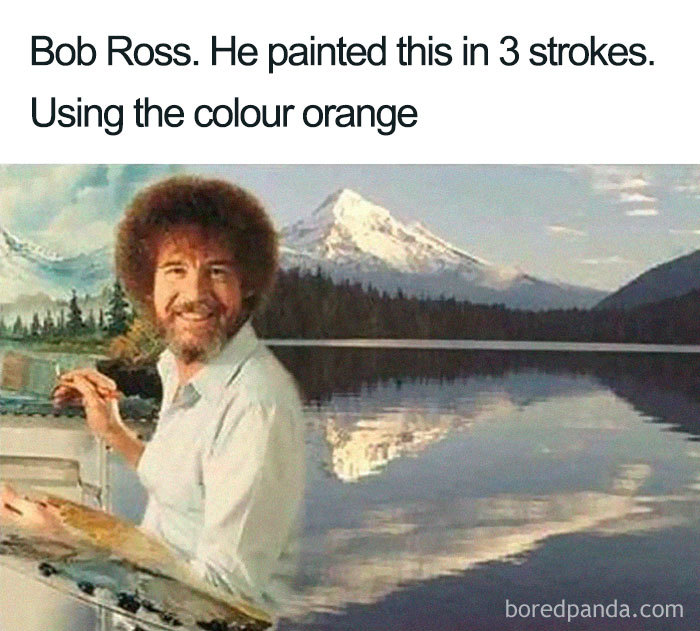

In [5]:
Image(filename = "bob3.jpg", width=1000, height=100)

So Bob Ross painted nature.

And he was kind of a cultural phenomenon!

We even have a dataset that keep track of all the things he painted in 403 episodes (so sweet! - from 538 github). 

Let's import and take a look.

In [6]:
bob = pd.read_csv("elements-by-episode.csv")
bob.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


So what do we have here?

Basically, each column is a different thing Bob may or may not have painted in that episode.

If Bob painted that thing in that episode, that column is a 1 in that row, if he didn't, it gets the zero!

So, if we look at Bushes, we can see Bob painted them in season 1 episode 1 and season 1 episode 4 (classic Bob!)




In [7]:
bob.shape

(403, 69)

Bob has 403 episodes and 67 different things he might have painted (excluding the episode and title).

Let's take a look.

In [8]:
bob.columns[2:]

Index(['APPLE_FRAME', 'AURORA_BOREALIS', 'BARN', 'BEACH', 'BOAT', 'BRIDGE',
       'BUILDING', 'BUSHES', 'CABIN', 'CACTUS', 'CIRCLE_FRAME', 'CIRRUS',
       'CLIFF', 'CLOUDS', 'CONIFER', 'CUMULUS', 'DECIDUOUS', 'DIANE_ANDRE',
       'DOCK', 'DOUBLE_OVAL_FRAME', 'FARM', 'FENCE', 'FIRE', 'FLORIDA_FRAME',
       'FLOWERS', 'FOG', 'FRAMED', 'GRASS', 'GUEST', 'HALF_CIRCLE_FRAME',
       'HALF_OVAL_FRAME', 'HILLS', 'LAKE', 'LAKES', 'LIGHTHOUSE', 'MILL',
       'MOON', 'MOUNTAIN', 'MOUNTAINS', 'NIGHT', 'OCEAN', 'OVAL_FRAME',
       'PALM_TREES', 'PATH', 'PERSON', 'PORTRAIT', 'RECTANGLE_3D_FRAME',
       'RECTANGULAR_FRAME', 'RIVER', 'ROCKS', 'SEASHELL_FRAME', 'SNOW',
       'SNOWY_MOUNTAIN', 'SPLIT_FRAME', 'STEVE_ROSS', 'STRUCTURE', 'SUN',
       'TOMB_FRAME', 'TREE', 'TREES', 'TRIPLE_FRAME', 'WATERFALL', 'WAVES',
       'WINDMILL', 'WINDOW_FRAME', 'WINTER', 'WOOD_FRAMED'],
      dtype='object')

Amazing.

So, let's think about two things we think might go together and using permutation testing to see if they do go together.

In particular, I bet `PALM_TREES` and `BEACH` go together.

So, let's start with a null:

**null**: Palm trees are no more likely to appear with beaches in Bob Ross paintings

**Alernative**: Palm trees are more likely to appear in Bob Ross paintings with beaches

In this case, we are doing a 1 sided test (only seein if Palm trees are more likely, not more or less likely).

We'll set a significance threshold of .05, so we just need to test if less than 5% of the simulations are as or more extreme than our observed statstic.

So firstly, what is our observed statistic?

Well, it is just the percentage of paintings with a beach that have palm trees.

Let's calculate that.

We'll start by just looking at paintings with a beach.

In [9]:
bob_beach = bob[bob.BEACH == 1].copy()
bob_beach.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
8,S01E09,"""SEASCAPE""",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,S04E05,"""EVENING SEASCAPE""",0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
105,S09E02,"""SURF'S UP""",0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
109,S09E06,"""SECLUDED BEACH""",0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
115,S09E12,"""MOUNTAIN-BY-THE-SEA""",0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Let's may sure this worked. If we use the `.unique()` function which will tell us all the unique vales in a given column. 

In [10]:
bob_beach.BEACH.unique()

array([1])

Sweet. 

How, how many of these beach episodes have palm trees?

Well, we know how many beach episodes there are (just the number of rows in `bob_beach`).

How many of them have palm trees? Well every one with palm trees is a 1, and the ones without are a zero.

So we can just add up the column `PALM_TREES` to count them.

In [11]:
bob_beach.PALM_TREES.sum()

7

In [14]:
bob_beach.shape[0]

27

In [15]:
measured_stat = bob_beach.PALM_TREES.sum()/bob_beach.shape[0]
measured_stat

0.25925925925925924

ok, now we see that about 26% of the episodes with beaches had palm trees.

Now, let's do a simulation.

How do we do this?

Well, for each simulation all we have to randomly permute palm_trees.

And then see how many of the beach paintings have palm trees in this permutation.

And then we can see how many of the iterations have a rate of 26% or greater for palm trees in beach paintings.

First, how to do a permutation?

Well, the below function just randomly permutes that column.

In [18]:
np.random.permutation(bob.PALM_TREES)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Notice, Bob didn't exactly LOVE palm trees cause he did not paint them often.

So now we are ready, let's do it:

In [19]:
num_iter = 10000 #number of simulations

prob_list = [] # the list we will use to keep track of how many beach paintings have palm trees for each iteration

for number in range(num_iter): #the loop!
    
    bob["perm_trees"] = np.random.permutation(bob.PALM_TREES) #a random permutation
    
    bob_perm = bob[bob.BEACH == 1].copy() #now just looking at the beaches
    
    iter_prob = bob_perm.perm_trees.sum()/bob_perm.shape[0] #find what percentage of beach have palm trees
    
    prob_list.append(iter_prob) #saving this number


All we do in the above is take the original bob data and for each iteration create a permuted column where we randomly assign whether there is a palm tree in a given painting.

Then we just calcuate what percentage of beach paintings have palm trees in this permutation.

Then we save that percentage. We'll then compare those percentages with the actual observed percentage.

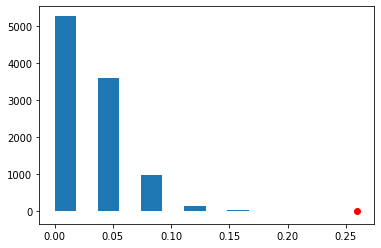

In [20]:
plt.hist(prob_list, bins= 10) #this graphs our simulation
plt.scatter(measured_stat, 0, color = 'red') #this graphs the observed statistic on top of it

WOW!

Looks like none of the permutations were as extreme as the observed statistic.

What is the P value?

In [21]:
count = 0 #keeping track of how many are as or more extreme

for a_prob in prob_list: #going through every prob
    
    if a_prob >= measured_stat: #checking if as or more extreme than what we measured
        
        count+=1 #add 1 to count if true

In [22]:
count/num_iter

0.0

Our P value is zero! 

Wow. Definitely reject the null!

In [27]:
bob.PALM_TREES.sum()/403

0.022332506203473945

In [26]:
bob.BEACH.sum()

27

# Extra Resources

## Groupby

We may not have time for this is in class, but I wanted to give you some more to look at for groupby statements.

Groupby is what is sounds like, it is `group by`.

We often want to look at data at a group level.

For example, let's say we have data on people, and we want to see information about people on the basis of state?

For example, average income by state.

We could subset, which would be go through the data set, subset by each state and calculate the average income of all the people in that state.

Or we could use groupby.

We could just group by state, and then calculate the mean of income.

How about we do this for ole Bob Ross?

Let's group by beach, and see the mean number of paintings with palm trees for paintings with and without beaches.

In [28]:
bob.groupby('BEACH')['PALM_TREES'].mean()

BEACH
0    0.005319
1    0.259259
Name: PALM_TREES, dtype: float64

Wow, that was effortless.

Basically, for paintings without a beach (0 on the index), only .0053 or .5% had palm trees.

Conversely, of the paintings with a beach (1 on the index), 26% had palm trees.

Notice, we grouped by `BEACH`, which means we told pandas to seperate the dataset into different groups based on the values of `BEACH`.

This means that we found the mean of rows where `BEACH` was one, and then seperatly found the mean of rows where `BEACH` is zero.

In this case we said just find the mean of `PALM_TREES`, but honestly we could ask for all columns.

In [29]:
bob.groupby('BEACH').mean()

,APPLE_FRAME,AURORA_BOREALIS,BARN,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,...,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED,perm_trees
BEACH,,,,,,,,,,,,,,,,,,,,,
0,0.00266,0.005319,0.045213,0.002660,0.018617,0.00266,0.316489,0.183511,0.010638,0.005319,...,0.952128,0.893617,0.00266,0.103723,0.021277,0.00266,0.00266,0.183511,0.00266,0.023936
1,0.00000,0.000000,0.000000,0.037037,0.000000,0.00000,0.037037,0.000000,0.000000,0.000000,...,0.111111,0.037037,0.00000,0.000000,0.962963,0.00000,0.00000,0.000000,0.00000,0.000000


Or just a few...

In [30]:
bob.groupby('BEACH')[['PALM_TREES', 'CABIN']].mean()

,PALM_TREES,CABIN
BEACH,,
0,0.005319,0.183511
1,0.259259,0.000000


No cabins on the beach apparently.

I honestly am getting an anti-beach vide from Bob.

Some questions:

1. What percentage of Beach paintings have waves?

2. What percentage of paintings with palm trees have beaches? (hint, its not 26%!)

3. What percentage of cabin paintings have bushes?

Notice, we can do all sorts of things with groupby.

We can use mean, median, sum and percentile.

How and when you use them will be up to you.

With the Bob data, it only makes sense to use mean.